In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install image_slicer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sewar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import cv2
from pathlib import Path
import keras
import tensorflow as tf
from PIL import Image
from tensorflow.keras.preprocessing import image
import seaborn as sns
from tensorflow.keras.models import load_model
import time
from matplotlib import gridspec
from image_slicer import slice
import image_slicer

In [ ]:
df  = pd.read_csv("/content/drive/MyDrive/label/df_rayong90_5m.csv")
df

,Name,Class
0,251_Rayong90_5month,disease
1,252_Rayong90_5month,disease
2,253_Rayong90_5month,disease
3,256_Rayong90_5month,disease
4,257_Rayong90_5month,disease
...,...,...
810,1434_Rayong90_5month,healthy
811,1437_Rayong90_5month,healthy
812,1446_Rayong90_5month,healthy
813,1477_Rayong90_5month,healthy


In [ ]:
path = '/content/drive/MyDrive/TRAIN_PROJECT/CONSENSUS_ori/'

In [ ]:
file_name = path + df['Name'] + '.jpg'

In [ ]:
consensus_ori = []
for i in range(len(file_name)):
  im = cv2.imread(file_name[i])
  im = im/255.0
  consensus_ori.append(im)

In [ ]:
pa = '/content/drive/MyDrive/slice/5 month/R90'
pic_list = os.listdir(pa)
pic_list_last = os.listdir(os.path.join(pa,pic_list[0]))
pic_list_last

['DSC_0582_01_01.jpg',
 'DSC_0582_01_02.jpg',
 'DSC_0582_01_03.jpg',
 'DSC_0582_01_04.jpg',
 'DSC_0582_02_01.jpg',
 'DSC_0582_02_02.jpg',
 'DSC_0582_02_03.jpg',
 'DSC_0582_02_04.jpg',
 'DSC_0582_03_01.jpg',
 'DSC_0582_03_02.jpg',
 'DSC_0582_03_03.jpg',
 'DSC_0582_03_04.jpg']

In [ ]:
pic_list

['DSC_0580',
 'DSC_0579',
 'DSC_0584',
 'DSC_0583',
 'DSC_0582',
 'DSC_0581',
 'DSC_0588',
 'DSC_0587',
 'DSC_0586',
 'DSC_0585',
 'DSC_0592',
 'DSC_0591',
 'DSC_0590',
 'DSC_0589',
 'DSC_0596',
 'DSC_0595',
 'DSC_0594',
 'DSC_0593',
 'DSC_0600',
 'DSC_0599',
 'DSC_0598',
 'DSC_0597',
 'DSC_0604',
 'DSC_0603',
 'DSC_0602',
 'DSC_0601',
 'DSC_0608',
 'DSC_0607',
 'DSC_0606',
 'DSC_0605',
 'DSC_0613',
 'DSC_0612',
 'DSC_0611',
 'DSC_0610',
 'DSC_0609',
 'DSC_0614']

In [ ]:
#slice_im = [cv2.imread(os.path.join(pa,pic_list[0],pic_list_last[i])) for i in range(len(pic_list_last))]
slice_im = []
for i in range(len(pic_list_last)):
  im = cv2.imread(os.path.join(pa, pic_list[0], pic_list_last[i]))
  im = im/255.
  slice_im.append(im)



In [ ]:
for i in range(len(slice_im)):
  print(slice_im[i].shape)

(1333, 1500, 3)
(1333, 1500, 3)
(1333, 1500, 3)
(1333, 1500, 3)
(1333, 1500, 3)
(1333, 1500, 3)
(1333, 1500, 3)
(1333, 1500, 3)
(1333, 1500, 3)
(1333, 1500, 3)
(1333, 1500, 3)
(1333, 1500, 3)


In [ ]:
idx = []
for i in range(len(consensus_ori)):
  if consensus_ori[i].shape == slice_im[0].shape:
    idx.append(i)

In [ ]:
for j in idx:
  consensus_ori[j] = cv2.resize(consensus_ori[j], (299,299), interpolation=cv2.INTER_NEAREST)

In [ ]:
for i in range(len(slice_im)):
  slice_im[i] = cv2.resize(slice_im[i], (299,299), interpolation=cv2.INTER_NEAREST)

In [ ]:
from sewar.full_ref import uqi, mse
from tqdm import tqdm

In [ ]:
result = dict()
for i in tqdm(range(len(slice_im))):
  for j in idx:
    diff = uqi(slice_im[i], consensus_ori[j])
    result[i,j] = [diff, pic_list_last[i] , df['Name'][j], df['Class'][j]]



100%|██████████| 12/12 [01:12<00:00,  6.06s/it]


In [ ]:
result

{(0, 0): [0.6991260992260294,
  'DSC_0582_01_01.jpg',
  '103_89_5month',
  'disease'],
 (0, 2): [0.6574259104542411,
  'DSC_0582_01_01.jpg',
  '105_89_5month',
  'disease'],
 (0, 3): [0.6764753437658175,
  'DSC_0582_01_01.jpg',
  '106_89_5month',
  'disease'],
 (0, 4): [0.7215902814324148,
  'DSC_0582_01_01.jpg',
  '107_89_5month',
  'disease'],
 (0, 5): [0.7408603912545919,
  'DSC_0582_01_01.jpg',
  '108_89_5month',
  'disease'],
 (0, 6): [0.7146241276736903,
  'DSC_0582_01_01.jpg',
  '109_89_5month',
  'disease'],
 (0, 7): [0.7026839124157767,
  'DSC_0582_01_01.jpg',
  '110_89_5month',
  'disease'],
 (0, 8): [0.7055124333440269,
  'DSC_0582_01_01.jpg',
  '111_89_5month',
  'disease'],
 (0, 9): [0.7040829770639762,
  'DSC_0582_01_01.jpg',
  '116_89_5month',
  'disease'],
 (0, 11): [0.6877366633921174,
  'DSC_0582_01_01.jpg',
  '118_89_5month',
  'disease'],
 (0, 12): [0.7349279439678513,
  'DSC_0582_01_01.jpg',
  '119_89_5month',
  'disease'],
 (0, 13): [0.6575085338658122,
  'DSC_058

In [ ]:
result_ = pd.DataFrame(result, index=['UQI', 'slice', 'consensus', 'label']) 
result_ = result_.T

In [ ]:
result_sort = result_.sort_values(by='UQI' ,ascending=False).head(12)
result_sort

UQI               slice      consensus    label
11 89   0.999402  DSC_0582_03_04.jpg  215_89_5month  disease
7  131  0.837198  DSC_0582_02_04.jpg  270_89_5month  disease
11 199  0.828905  DSC_0582_03_04.jpg  382_89_5month  disease
   33   0.824424  DSC_0582_03_04.jpg  144_89_5month  disease
   154  0.823976  DSC_0582_03_04.jpg  325_89_5month  disease
   12   0.822915  DSC_0582_03_04.jpg  119_89_5month  disease
   235  0.821208  DSC_0582_03_04.jpg  278_89_5month  healthy
7  136  0.820985  DSC_0582_02_04.jpg  283_89_5month  disease
11 131  0.820089  DSC_0582_03_04.jpg  270_89_5month  disease
7  154  0.819345  DSC_0582_02_04.jpg  325_89_5month  disease
11 136  0.819203  DSC_0582_03_04.jpg  283_89_5month  disease
   124  0.817322  DSC_0582_03_04.jpg  254_89_5month  disease

In [ ]:
result_sort.to_csv('/content/drive/MyDrive/DSC_0610.csv')

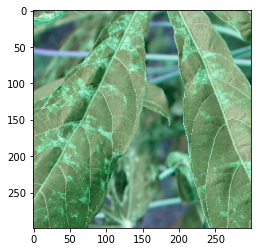

In [ ]:
plt.imshow(consensus_ori[199])

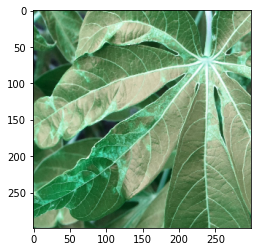

In [ ]:
plt.imshow(slice_im[5])